In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
# 데이터 프레임 만들기, column 이름 -> 피쳐
# 정답값 -> 데이터 프레임
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names) 
labels = pd.DataFrame(iris.target)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [5]:
data = pd.concat([data, labels], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### dbscan

In [15]:
model = DBSCAN(eps=0.5, min_samples=5)
predict  = pd.DataFrame(model.fit_predict(data))
predict.columns=['predict']

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [16]:
predict

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [17]:
r = pd.concat([data, predict], axis=1)
r

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


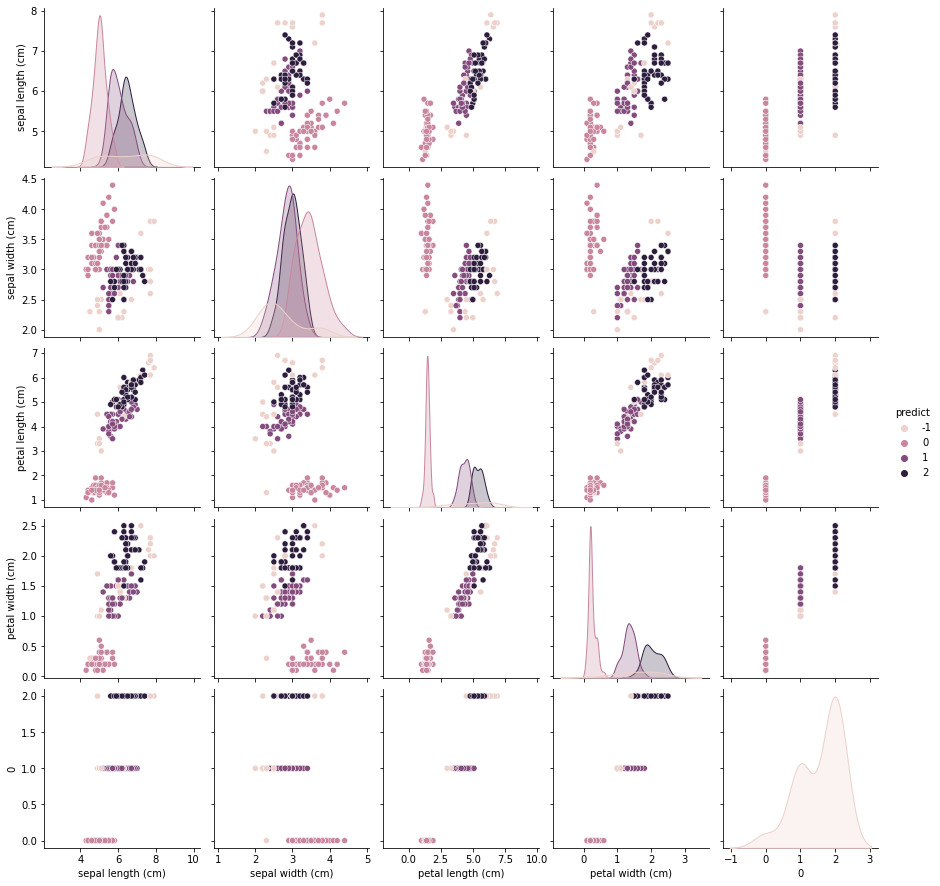

In [18]:
sns.pairplot(r, hue='predict')  # pairplot()
plt.show()

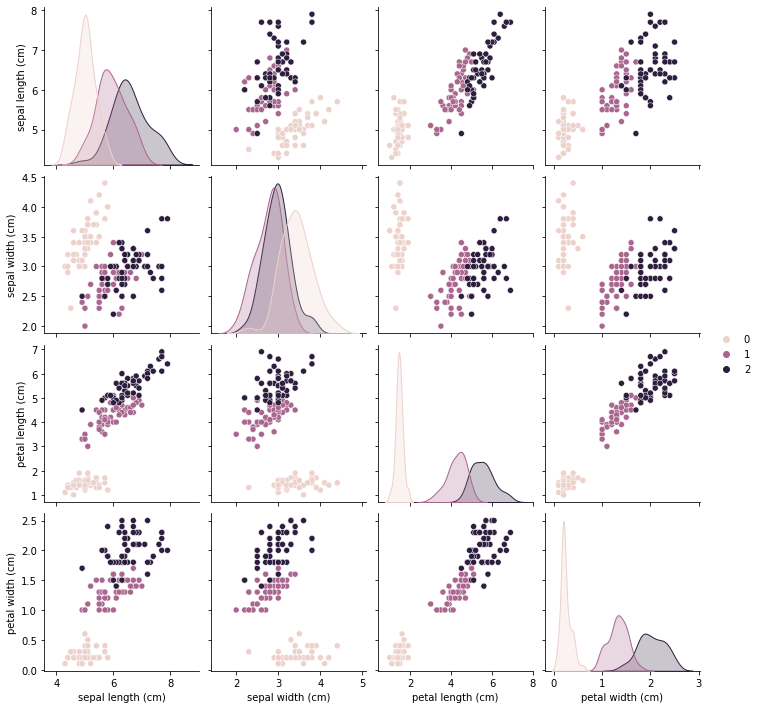

In [19]:
sns.pairplot(data, hue=0)
plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=3, random_state=21)
km.fit(data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3, random_state=21)

In [22]:
pred = pd.DataFrame(km.labels_)
pred.columns=['predict']

In [23]:
r2 = pd.concat([data, pred], axis=1)
r2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0,predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [24]:
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   0                  150 non-null    int32  
 5   predict            150 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 6.0 KB


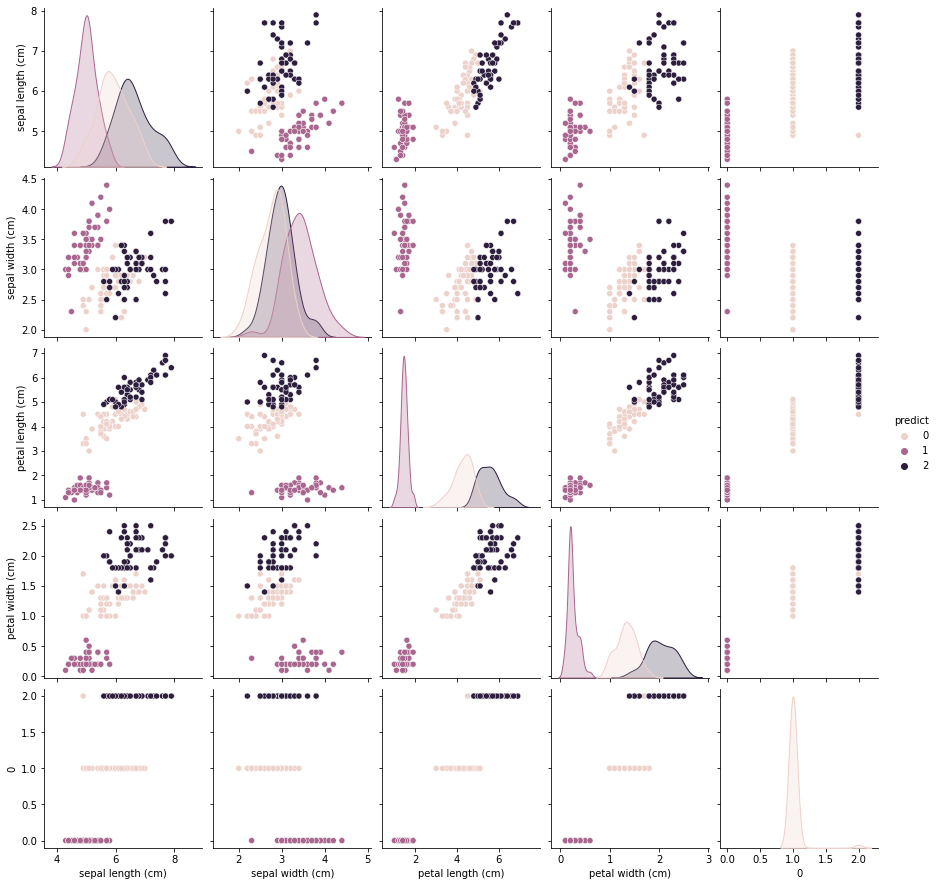

In [25]:
sns.pairplot(r2, hue='predict') # hue= -> 어떤 기준으로 쪼갤거임?
plt.show()

- 아이리스 데이터에서 결과가 K-Means가 더 좋아 보이지만 모든 데이터에서 K-Means가 군집분석을 잘한다는 의미는 아니다.
- 머신에서는 무조건적으로 좋다고 말 할 수 있는 모델은 없다. -> 각각 다른 데이터들에 대해서 그 데이터를 분석하고 어떤 알고리즘이 사용하기에 적합한지 판단을 해야 한다.
- 결론: 데이터 특성에 맞는 모델을 사용해야 한다.